# Navie Bayes
`Naive Bayes` is a fundamental algorithm in machine learning, renowned for its simplicity and effectiveness in classification tasks. It's based on Bayes' theorem, which calculates the probability of a hypothesis given the evidence. 
- Despite its "naive" assumption of independence among features, it often performs remarkably well, especially with large datasets. 
- Naive Bayes models are widely used in various applications such as spam filtering, sentiment analysis, and medical diagnosis due to their efficiency, ease of implementation, and ability to handle high-dimensional data.





# car dataset using Navie Bayes
car datasets,`Naive Bayes` presents a compelling approach for classification tasks. By employing this algorithm, we can discern patterns and make predictions based on attributes such as make, model, year, and performance metrics. 
- Naive Bayes operates on the principle of conditional probability, assuming independence among features, which often proves effective in diverse automotive contexts. 
- Whether predicting car types, estimating fuel efficiency, or identifying maintenance needs, `Naive Bayes` offers a robust framework for extracting insights from `car datasets` with relative ease and efficiency.

# Import needed Library


In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn as sk
%matplotlib inline

# Data Collection 
Gather a dataset containing information about cars including features like mileage,year, brand, model, color,price,condiction along with labels indicating their condition




In [2]:
car=pd.read_csv("Car_Data.csv")

# Exploring the Data

In [3]:
car.shape

(100000, 8)

In [4]:
car.head(5)

,ID,Brand,Model,Year,Color,Mileage,Price,Condition
0,1,Mazda,Generic Model 3,2003,Blue,22932,65732,New
1,2,Jaguar,Generic Model 2,2003,Silver,89937,58620,New
2,3,Land Rover,Generic Model 2,2022,Green,36616,50574,New
3,4,Porsche,Generic Model 2,1997,Black,82812,35436,Used
4,5,Land Rover,Generic Model 3,2000,Black,184616,63880,Used


In [5]:
car.dtypes

ID            int64
Brand        object
Model        object
Year          int64
Color        object
Mileage       int64
Price         int64
Condition    object
dtype: object

In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ID         100000 non-null  int64 
 1   Brand      100000 non-null  object
 2   Model      100000 non-null  object
 3   Year       100000 non-null  int64 
 4   Color      100000 non-null  object
 5   Mileage    100000 non-null  int64 
 6   Price      100000 non-null  int64 
 7   Condition  100000 non-null  object
dtypes: int64(4), object(4)
memory usage: 6.1+ MB


In [7]:
car.columns

Index(['ID', 'Brand', 'Model', 'Year', 'Color', 'Mileage', 'Price',
       'Condition'],
      dtype='object')

In [8]:
car.isnull().sum()

ID           0
Brand        0
Model        0
Year         0
Color        0
Mileage      0
Price        0
Condition    0
dtype: int64

In [9]:
car['Brand'].nunique()

20

In [10]:
car['Model'].nunique()

21

In [11]:
car['Color'].nunique()

6

In [12]:
car['Condition'].nunique()

2

In [98]:
car['Condition'].unique()

array([1, 0], dtype=int64)

# Data Analysis and Visualization

<Axes: xlabel='Condition', ylabel='Price'>

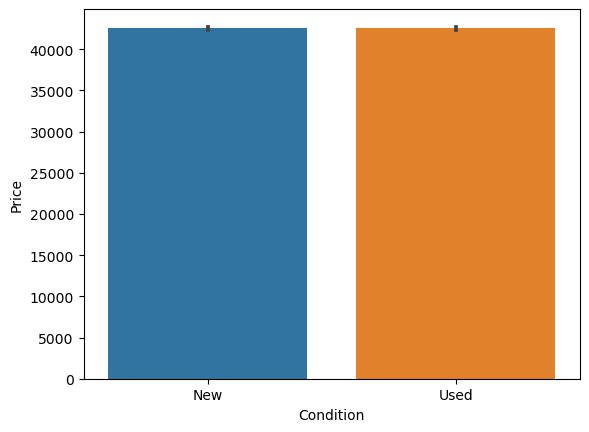

In [14]:
sns.barplot(x=car['Condition'],y=car['Price'])

In [37]:
data=car.head(50)

In [38]:
data.head(3)

,ID,Brand,Model,Year,Color,Mileage,Price,Condition
0,1,Mazda,Generic Model 3,2003,Blue,22932,65732,New
1,2,Jaguar,Generic Model 2,2003,Silver,89937,58620,New
2,3,Land Rover,Generic Model 2,2022,Green,36616,50574,New


In [39]:
sns.set(rc={'axes.facecolor':'#BE5BDB','axes.grid':True})

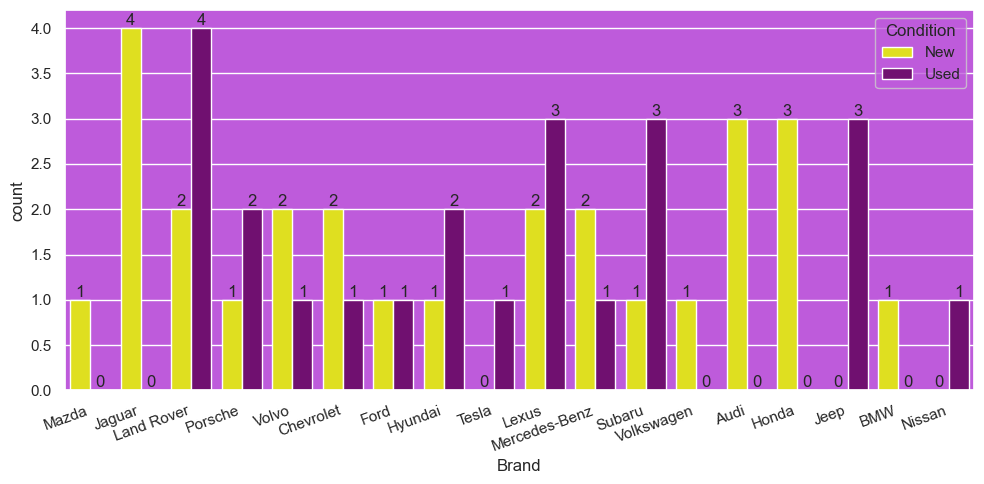

In [40]:
plt.figure(figsize=(10,5))
count=sns.countplot(x=data['Brand'],hue=data['Condition'],palette=['yellow','purple'])
for i in count.containers:
    count.bar_label(i)
count.set_xticklabels(count.get_xticklabels(),rotation=20,ha='right')
plt.tight_layout()

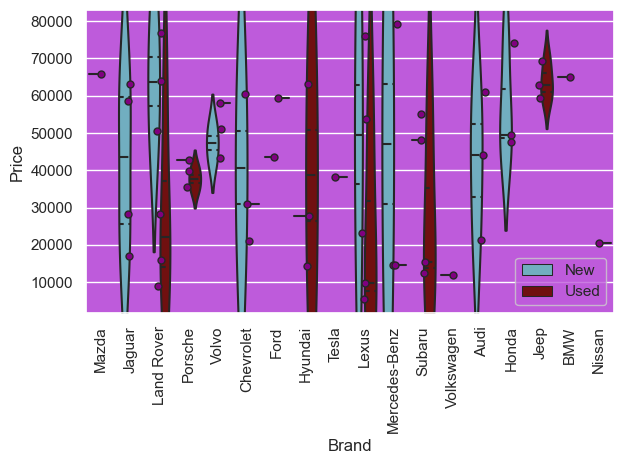

In [41]:
sns.violinplot(y=data['Price'],x=data['Brand'],hue=data['Condition'],palette=['c','maroon'],inner='quartile')
sns.stripplot(y=data['Price'],x=data['Brand'],color='purple',linewidth=1)
plt.xticks(rotation=90)
plt.tight_layout()

In [54]:
sns.set(rc={'axes.facecolor':'black','axes.grid':'False'})

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

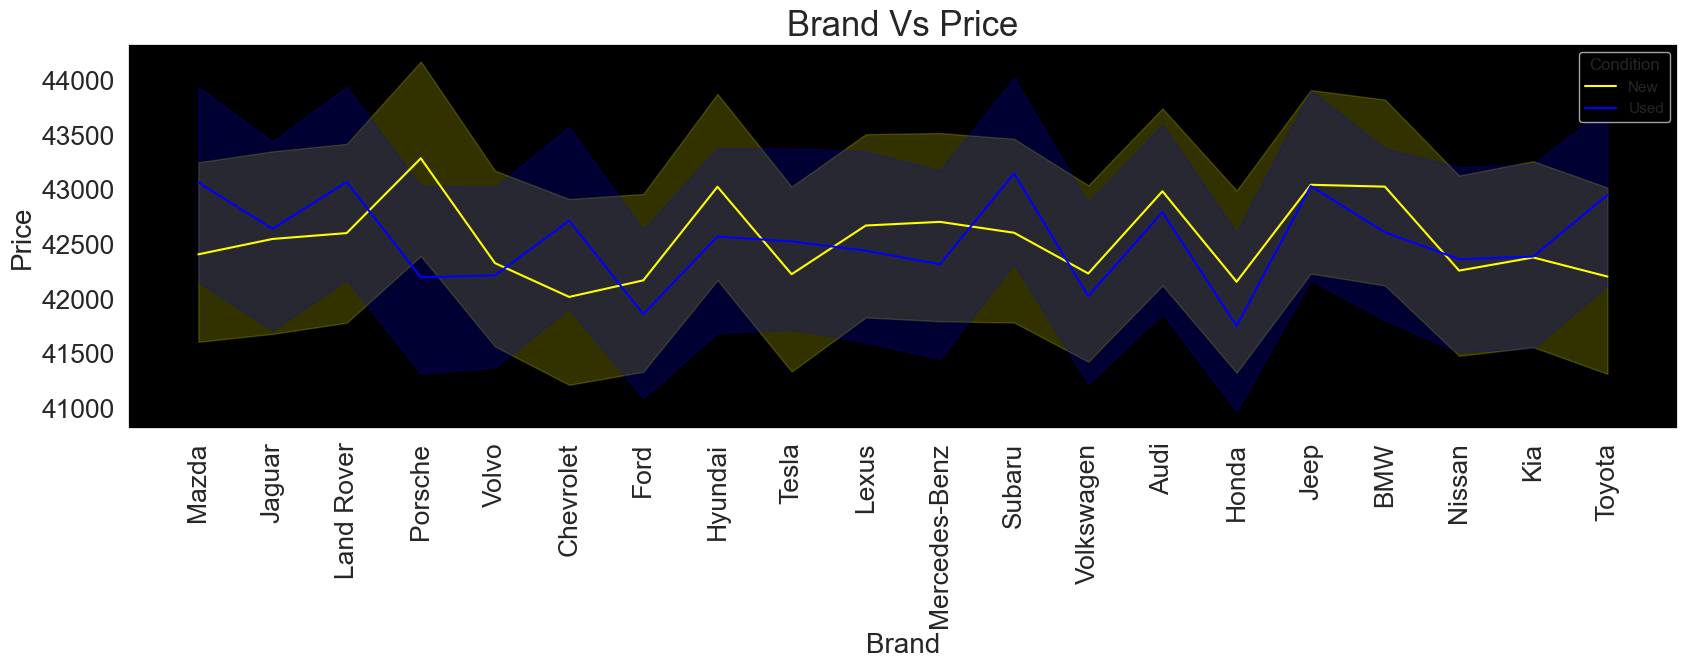

In [43]:
plt.figure(figsize=(20,5))
sns.lineplot(x=car['Brand'],y=car['Price'],hue=car['Condition'],palette=['yellow','blue'])
plt.xticks(rotation=90,fontsize=19)
plt.yticks(fontsize=19)
plt.xlabel("Brand",fontsize=20)
plt.ylabel("Price",fontsize=20)
plt.title('Brand Vs Price',fontsize=25)
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

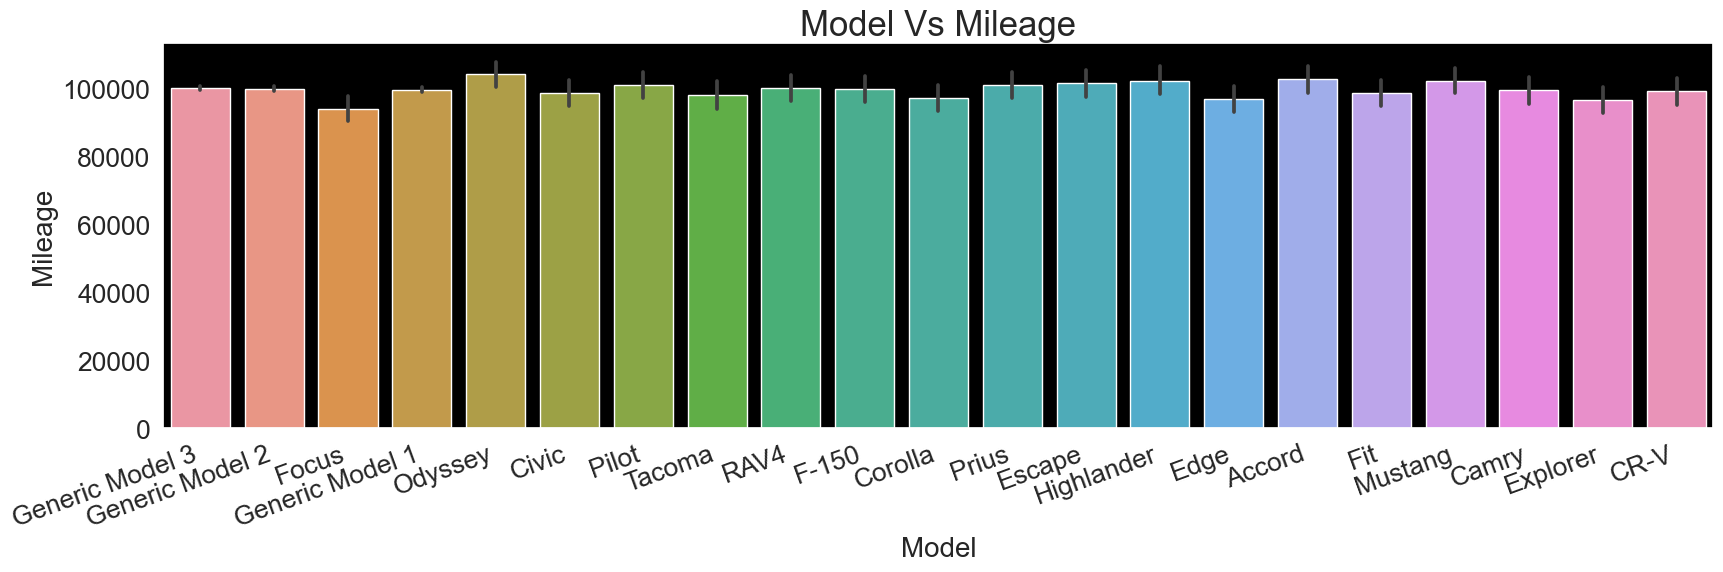

In [44]:
plt.figure(figsize=(20,5))
sns.barplot(x=car['Model'],y=car['Mileage'])
plt.xticks(rotation=20,ha='right',fontsize=19)
plt.yticks(fontsize=19)
plt.xlabel("Model",fontsize=20)
plt.ylabel("Mileage",fontsize=20)
plt.title('Model Vs Mileage',fontsize=25)
plt.tight_layout

<Axes: xlabel='Price', ylabel='Count'>

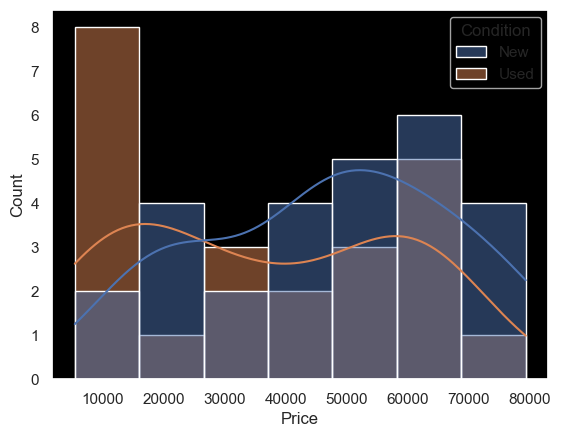

In [61]:
sns.histplot(x=car['Price'],kde=True,hue=data['Condition'])

<Axes: xlabel='Color', ylabel='count'>

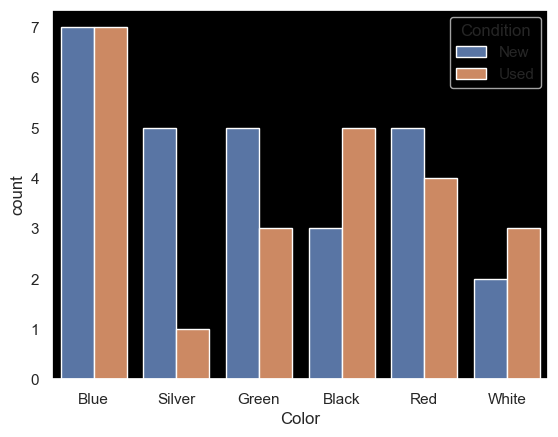

In [65]:
sns.countplot(x=data['Color'],hue=data['Condition'])


In [66]:
sns.set(rc={'axes.facecolor':'#54a832','axes.grid':'True'})

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

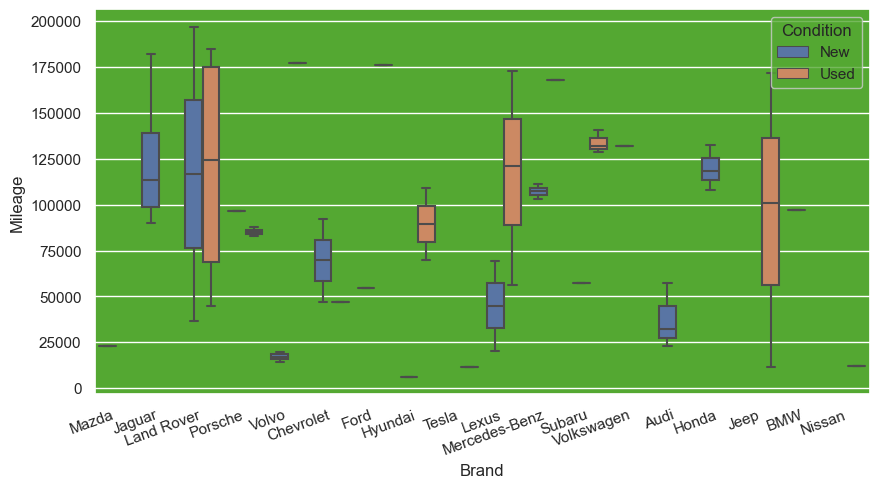

In [72]:
plt.figure(figsize=(10,5))
sns.boxplot(x=data['Brand'],y=data['Mileage'],hue=data['Condition'])
plt.xticks(rotation=20,ha='right')
plt.tight_layout

In [99]:
sns.set(rc={'axes.facecolor':'#a83281','axes.grid':'True'})

# Cleaning the Data

In [73]:
car.columns

Index(['ID', 'Brand', 'Model', 'Year', 'Color', 'Mileage', 'Price',
       'Condition'],
      dtype='object')

In [74]:
car.drop('ID',inplace=True,axis=1)

In [75]:
car['Condition'].unique()

array(['New', 'Used'], dtype=object)

In [76]:
car['Condition']=car['Condition'].map({'New':1, 'Used':0})

In [77]:
car.head(4)

,Brand,Model,Year,Color,Mileage,Price,Condition
0,Mazda,Generic Model 3,2003,Blue,22932,65732,1
1,Jaguar,Generic Model 2,2003,Silver,89937,58620,1
2,Land Rover,Generic Model 2,2022,Green,36616,50574,1
3,Porsche,Generic Model 2,1997,Black,82812,35436,0


In [78]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

In [79]:
car['Model']=encoder.fit_transform(car['Model'])
car['Brand']=encoder.fit_transform(car['Brand'])
car['Color']=encoder.fit_transform(car['Color'])


In [80]:
car.head(4)

,Brand,Model,Year,Color,Mileage,Price,Condition
0,11,13,2003,1,22932,65732,1
1,6,12,2003,4,89937,58620,1
2,9,12,2022,2,36616,50574,1
3,14,12,1997,0,82812,35436,0


In [81]:
car.dtypes

Brand        int32
Model        int32
Year         int64
Color        int32
Mileage      int64
Price        int64
Condition    int64
dtype: object

In [82]:
car.isna().sum()

Brand        0
Model        0
Year         0
Color        0
Mileage      0
Price        0
Condition    0
dtype: int64

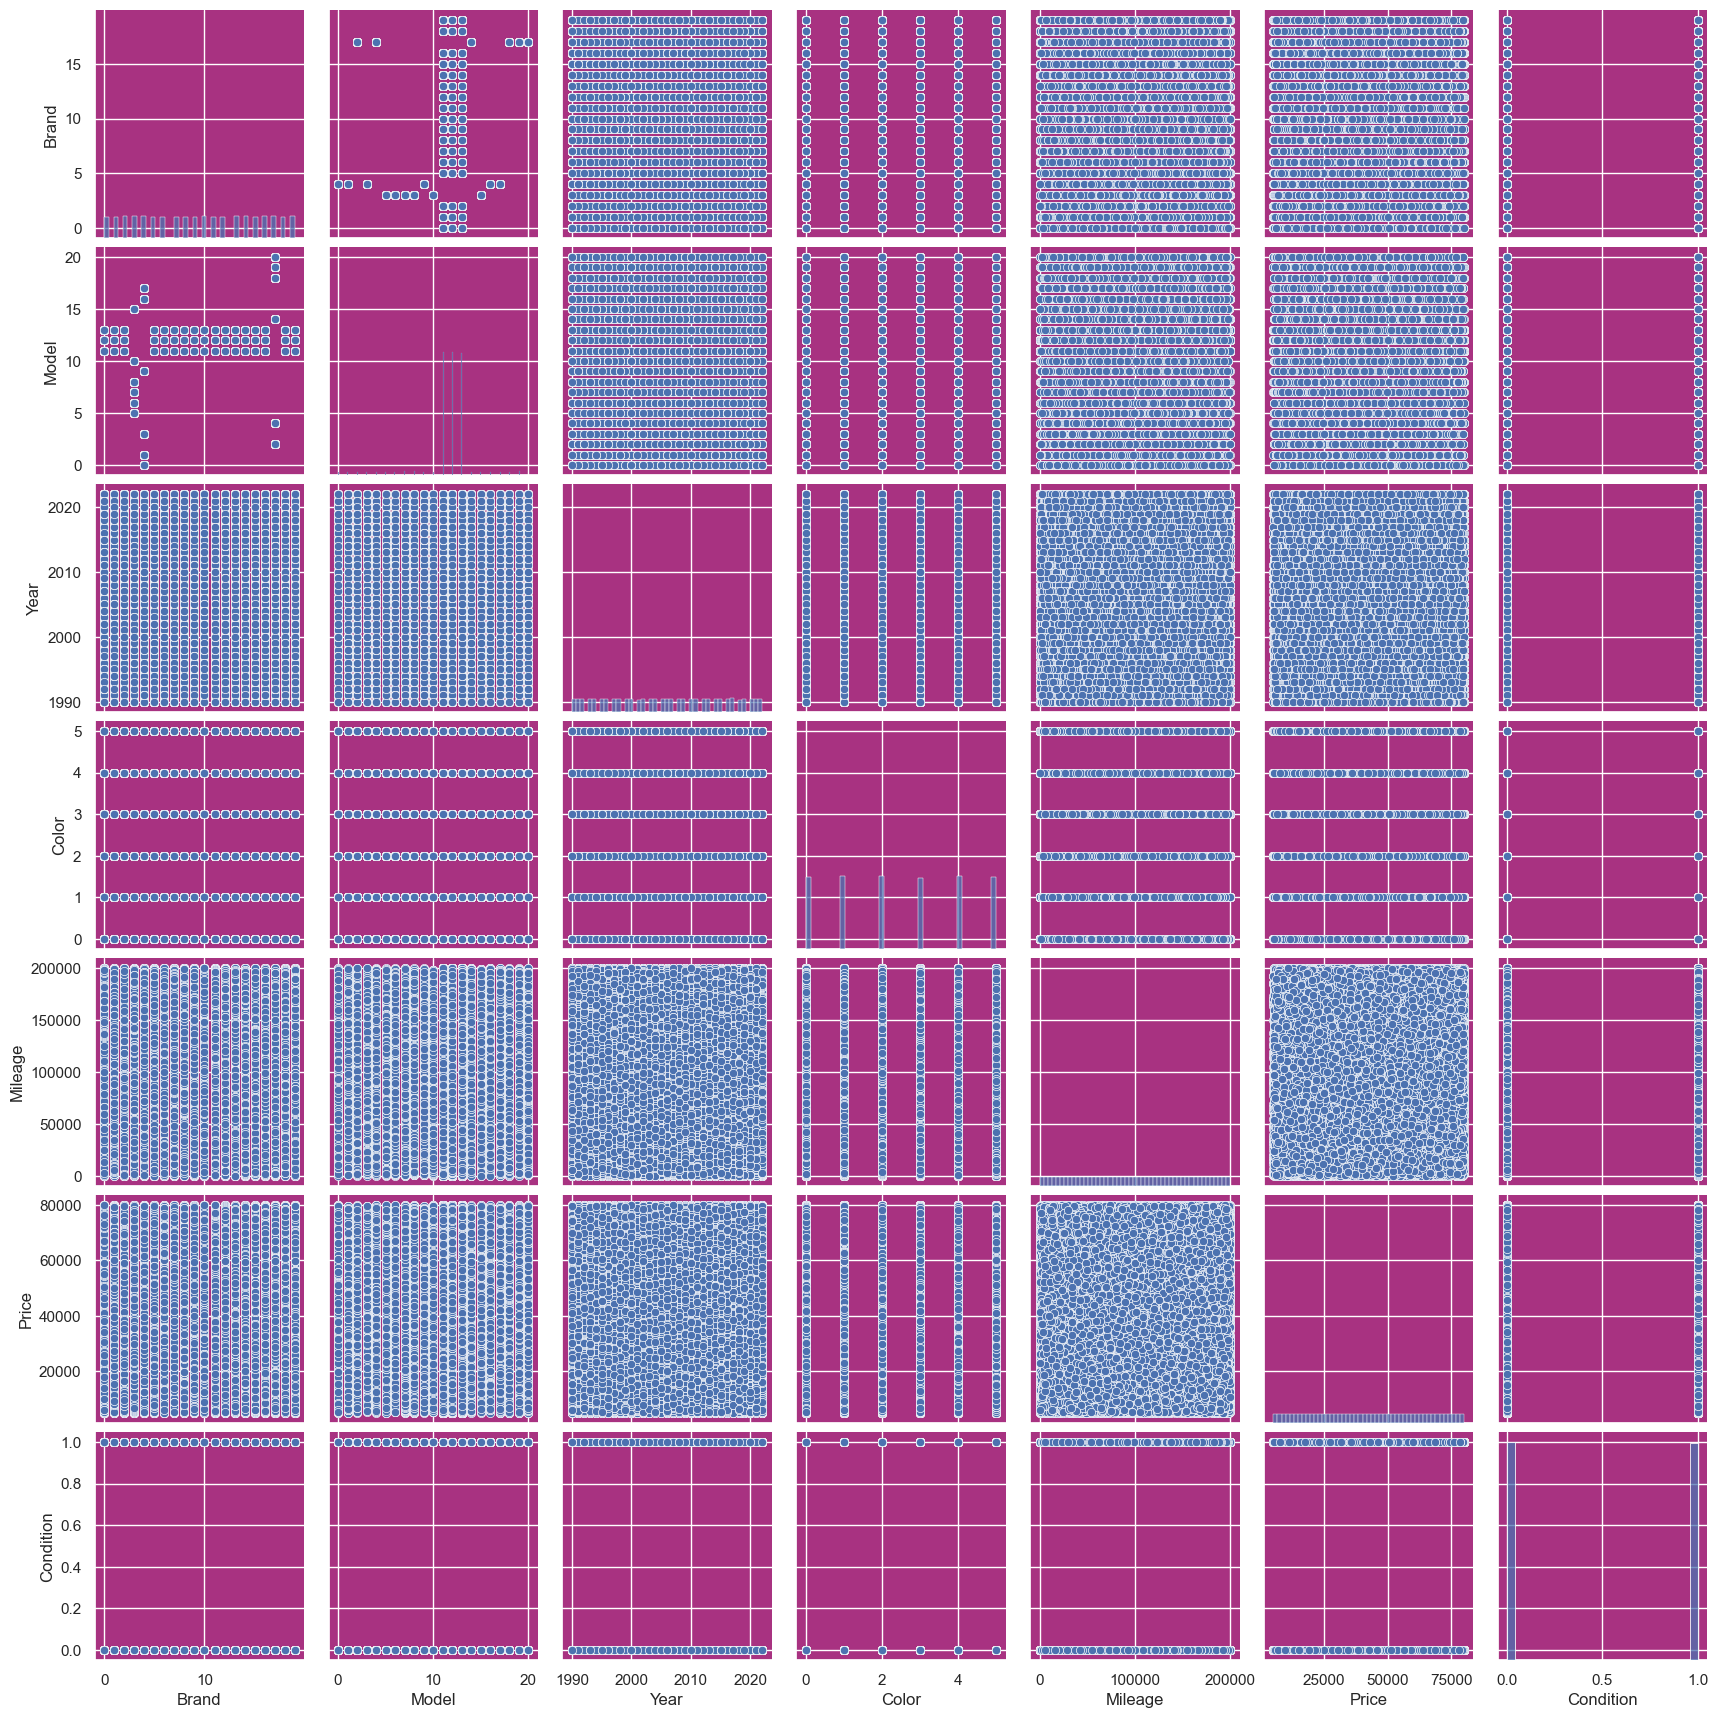

In [86]:
sns.pairplot(vars=car,data=car)

# Traning the data set

In [ ]:
x=car.drop('Condition',axis=1)

In [88]:
y=car['Condition']

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [90]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,confusion_matrix

In [91]:
Gass=GaussianNB ()
Gass.fit(X_train,y_train)
print(f'''score{Gass.score(X_train,y_train)}''')
y_pred=Gass.predict(X_test)
Acu=accuracy_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("Accuracy:",Acu)
print("Mean Squared Error:",mse)
print("Mean Absolute Error:",mae)

score0.503875
Accuracy: 0.5011
Mean Squared Error: 0.4989
Mean Absolute Error: 0.4989


In [112]:
actual_value=y_test
prediction=y_pred
print("Actual Value:",actual_value[:5])
print("Predicted Value",prediction[:5])

Actual Value: 81125    0
2945     0
28790    0
82297    0
36910    0
Name: Condition, dtype: int64
Predicted Value [1 1 1 1 1]


In [115]:
sns.set(rc={'axes.facecolor':'k','axes.grid':'False'})

Text(0.5, 1.0, 'Actual Value Vs Predicted Value')

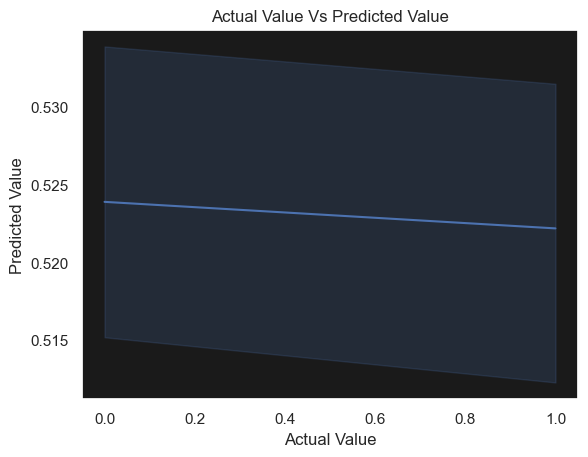

In [116]:
sns.lineplot(x=actual_value,y=prediction)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual Value Vs Predicted Value")

In [95]:
cnc=confusion_matrix(y_test,y_pred)
cnc

array([[4800, 5239],
       [4739, 5222]], dtype=int64)

<Axes: >

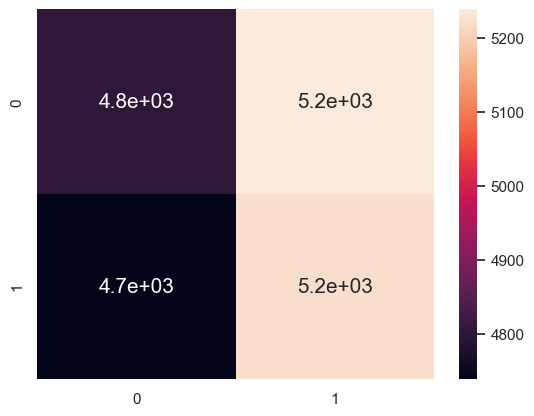

In [97]:
sns.heatmap(cnc,annot=True,annot_kws={'fontsize':15})

# Final Output

In [107]:
Gass.predict([[7,11,2002,3,32034,45623]])

array([1], dtype=int64)